In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

%matplotlib inline
set_matplotlib_formats('svg')
plt.rcParams.update({'font.size': 36})

/tmp/ipykernel_192522/4277948159.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [2]:
result_list = []
with open('saved/gpt-4-1106-preview/evaluated_nil_N_{}_tokens_{}_step_{}_stride_{}_seed_{}.pkl'.format(
    10,
    128,
    256+128, 
    16,
    0), 'rb') as handle:
    
    result_list += pickle.load(handle)

df = pd.DataFrame.from_records(result_list)
df.head()

,step,suffix,adv_suffix,loss,best,seed
0,0,"[335, 335, 335, 335, 335, 335, 335, 335, 335, ...",} } } } } } } } } } } } } } } } } } } } } } }...,0.505653,0.505653,0
1,1,"[335, 335, 335, 335, 335, 335, 335, 335, 335, ...",} } } } } } } } } } } } } } } } } } } } } } }...,0.496302,0.496302,0
2,2,"[335, 335, 335, 335, 335, 335, 335, 335, 335, ...",} } } } } } } } } } } } } } } } } } } } } } }...,0.598625,0.496302,0
3,3,"[335, 335, 335, 335, 335, 335, 335, 335, 335, ...",} } } } } } } } } } } } } } } } } } } } } } }...,0.309161,0.309161,0
4,4,"[335, 335, 335, 335, 335, 335, 335, 335, 335, ...",} } } } } } } } } } } } } } } } } } } } } } }...,0.636081,0.309161,0


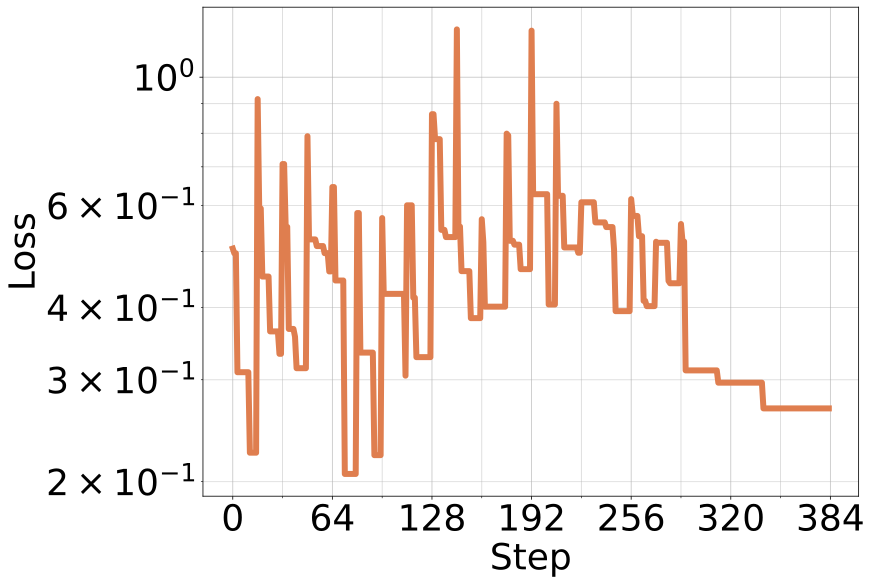

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), 
                         constrained_layout=True)

major_ticks = np.arange(0, 384+1, 64)
minor_ticks = np.arange(0, 384+1, 32)


sns.lineplot(data=df, 
                x='step', 
                y='best', 
                linewidth=6, 
                color=(223/255, 126/255, 79/255),
             ax=ax)


ax.set_yscale('log')

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.75)

ax.set_xlabel(r"Step",)

ax.set_ylabel("Loss",)


filename = "../viz/gpt-4-1106-preview_vs_nil.pdf"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.1)